# Diabetes Insight

## Data Preparation

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_parquet("../diabetes_dataset.parquet")
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.600000,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.000000,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.700001,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.200001,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.500000,Type 2,1


The following columns will be binned: 

- 'age',
- 'diet_score',
- 'sleep_hours_per_day',
- 'screen_time_hours_per_day',
- 'bmi',
- 'systolic_bp',
- 'diastolic_bp',
- 'heart_rate',
- 'cholesterol_total',
- 'hdl_cholesterol',
- 'ldl_cholesterol',
- 'triglycerides',
- 'glucose_fasting',
- 'glucose_postprandial',
- 'insulin_level',
- 'hba1c'

The following columns likely require logarithmic transformation: 
- alcohol_consumption_per_week
- physical_activity_minutes_per_week

In [3]:
df[['age',
 'diet_score',
 'sleep_hours_per_day',
 'screen_time_hours_per_day',
 'bmi',
 'systolic_bp',
 'diastolic_bp',
 'heart_rate',
 'cholesterol_total',
 'hdl_cholesterol',
 'ldl_cholesterol',
 'triglycerides',
 'glucose_fasting',
 'glucose_postprandial',
 'insulin_level',
 'hba1c']].describe()

,age,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50.12041,5.994786,6.997818,5.996468,25.612652,115.799610,75.23249,69.632870,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776
std,15.60460,1.780893,1.094508,2.468406,3.587007,14.284073,8.20425,8.371954,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.953978,0.813883
min,18.00000,0.000000,3.000000,0.500000,15.000000,90.000000,50.00000,40.000000,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000
25%,39.00000,4.800000,6.300000,4.300000,23.200001,106.000000,70.00000,64.000000,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000
50%,50.00000,6.000000,7.000000,6.000000,25.600000,116.000000,75.00000,70.000000,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000
75%,61.00000,7.200000,7.700000,7.700000,28.000000,125.000000,81.00000,75.000000,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000
max,90.00000,10.000000,10.000000,16.799999,39.200001,179.000000,110.00000,105.000000,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220001,9.800000


In [ ]:
binning_dict = {
    # Age categories based on common demographic groupings
    "age": {
        "bins": [18, 30, 40, 50, 60, 70, 80, 91],
        "labels": ["18-29","30-39","40-49","50-59","60-69","70-79","80+"]
    },
    # Diet score categories created arbitrarily for this dataset
    "diet_score": {
        "bins": [0, 4, 7, 9, 10],
        "labels": ["Poor","Fair","Good","Excellent"]
    },
    # The National Sleep Foundation recommends 7-9 hours of sleep for adults aged 18-64 and 7-8 hours for those 65 and older
    "sleep_hours_per_day": {
        "bins": [0, 5, 7, 9, 11],
        "labels": ["Very Short","Short","Normal","Long"]
    },
    # Screen time categories created arbitrarily for this dataset
    "screen_time_hours_per_day": {
        "bins": [0, 2, 5, 8, 17],
        "labels": ["Low","Moderate","High","Very High"]
    },
    # BMI categories based on WHO standards; The dataset does not contain values above 40, which would represent Obese III
    "bmi": {
        "bins": [0, 18.5, 25, 30, 35, 40],
        "labels": ["Underweight","Normal","Overweight","Obese I","Obese II"]
    },
    # Blood pressure categories based on American Heart Association guidelines; The dataset does not contain values above 180, which would represent Hypertensive crisis
    "systolic_bp": {
        "bins": [0, 120, 130, 140, 180],
        "labels": ["Normal","Elevated","HTN Stage 1","HTN Stage 2"]
    },
    # Diastolic blood pressure categories based on American Heart Association guidelines; The dataset does not contain values above 120, which would represent Hypertensive crisis
    "diastolic_bp": {
        "bins": [0, 80, 90, 120],
        "labels": ["Normal","HTN Stage 1","HTN Stage 2"]
    },
    # Heart rate categories based on common clinical guidelines
    "heart_rate": {
        "bins": [0, 60, 100, 120],
        "labels": ["Bradycardia","Normal","Tachycardia"]
    },
    # Cholesterol categories based on American Heart Association guidelines
    "cholesterol_total": {
        "bins": [0, 200, 240, 400],
        "labels": ["Desirable","Borderline high","High"]
    },
    # HDL cholesterol categories based on American Heart Association guidelines
    "hdl_cholesterol": {
        "bins": [0, 40, 60, 120],
        "labels": ["Low","Normal","High"]
    },
    # LDL cholesterol categories based on American Heart Association guidelines
    "ldl_cholesterol": {
        "bins": [0, 100, 130, 160, 190, 300],
        "labels": ["Optimal","Near optimal","Borderline high","High","Very high"]
    },
    # Triglycerides categories based on American Heart Association guidelines; The dataset does not contain values above 344. Values above 500 would represent Very high
    "triglycerides": {
        "bins": [0, 150, 200, 500],
        "labels": ["Normal","Borderline high","High"]
    },
    # Fasting glucose categories based on American Diabetes Association guidelines
    "glucose_fasting": {
        "bins": [0, 100, 126, 300],
        "labels": ["Normal","Prediabetes","Diabetes"]
    },
    # Postprandial glucose categories based on American Diabetes Association guidelines
    "glucose_postprandial": {
        "bins": [0, 140, 200, 400],
        "labels": ["Normal","Prediabetes","Diabetes"]
    },
    # Insulin level categories based on common clinical reference ranges
    "insulin_level": {
        "bins": [0, 2, 25, 50],
        "labels": ["Low","Normal","High"]
    },
    # HbA1c categories based on American Diabetes Association guidelines
    "hba1c": {
        "bins": [0, 5.7, 6.5, 15],
        "labels": ["Normal","Prediabetes","Diabetes"]
    }
}

for col, config in binning_dict.items():
    df[col] = pd.cut(df[col], bins=config["bins"], labels=config["labels"], right=False)

df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,50-59,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,Fair,...,Normal,High,Normal,Diabetes,Diabetes,Normal,Diabetes,29.600000,Type 2,1
1,40-49,Female,White,Highschool,Middle,Employed,Former,1,143,Fair,...,Normal,Optimal,Normal,Normal,Prediabetes,Normal,Normal,23.000000,No Diabetes,0
2,60-69,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,Fair,...,High,Optimal,Normal,Prediabetes,Prediabetes,Normal,Diabetes,44.700001,Type 2,1
3,70-79,Female,Black,Highschool,Low,Retired,Never,0,49,Poor,...,Normal,Optimal,Normal,Diabetes,Diabetes,Normal,Diabetes,38.200001,Type 2,1
4,40-49,Male,White,Graduate,Middle,Retired,Never,1,109,Good,...,Normal,Near optimal,Borderline high,Diabetes,Prediabetes,Normal,Diabetes,23.500000,Type 2,1


Now let us see what we can get with logarithmic transformations.

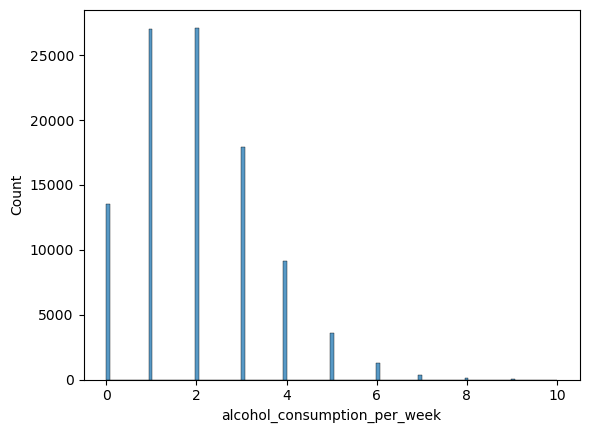

In [5]:
sns.histplot(df["alcohol_consumption_per_week"]);

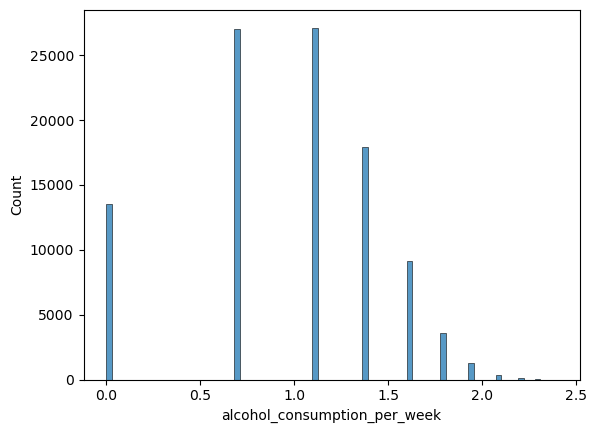

In [6]:
sns.histplot(np.log1p(df["alcohol_consumption_per_week"]));

This seems to help the values in the alcohol_consumption_per_week columns appear more normally distributed. Now let us try the same with the physical_activity_minutes_per_week column.

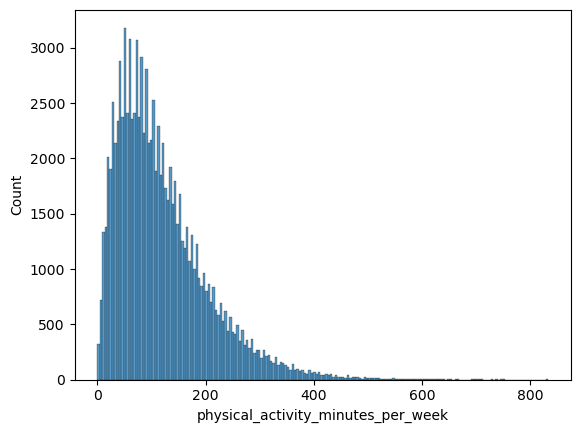

In [7]:
sns.histplot(df["physical_activity_minutes_per_week"]);

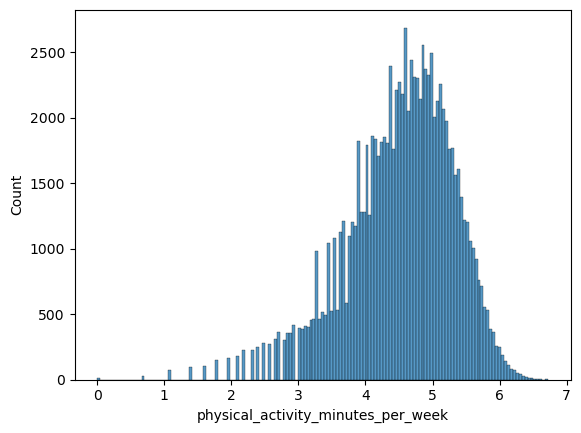

In [8]:
sns.histplot(np.log1p(df["physical_activity_minutes_per_week"]));

Neither of the two transformed columns shows perfect normal distribution, but it seems to be good enough. That said, interpretation is the most important goal of this project. Hence, the code that implements the logarithmic transformations on these two columns will be commented out for now, and binning will be used instead. If accuracy or f1 score become more important than interpretability, the following cell may help a little bit.

In [9]:
# df["alcohol_consumption_per_week"] = np.log1p(df["alcohol_consumption_per_week"])
# df["physical_activity_minutes_per_week"] = np.log1p(df["physical_activity_minutes_per_week"])

# df.head()

Now let us bin these two columns.

In [10]:
df[["alcohol_consumption_per_week", "physical_activity_minutes_per_week"]].describe()

,alcohol_consumption_per_week,physical_activity_minutes_per_week
count,100000.000000,100000.000000
mean,2.003670,118.911640
std,1.417779,84.409662
min,0.000000,0.000000
25%,1.000000,57.000000
50%,2.000000,100.000000
75%,3.000000,160.000000
max,10.000000,833.000000


In [12]:
# Overwriting the global binning_dict to include the two new columns

binning_dict = {
    # -1 to include zero alcohol consumption
    "alcohol_consumption_per_week": {
        "bins": [-1, 0, 2, 5, 11],
        "labels": ["None","Light","Moderate", "Heavy"]
    },
    # WHO recommends at least 150 minutes of moderate physical activity per week for adults
    "physical_activity_minutes_per_week": {
        "bins": [-1, 30, 100, 150, 300, 3000],
        "labels": ["Sedentary","Light","Moderate","Active","Very Active"]
    }
}

for col, config in binning_dict.items():
    df[col] = pd.cut(df[col], bins=config["bins"], labels=config["labels"], right=False)

df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,50-59,Male,Asian,Highschool,Lower-Middle,Employed,Never,Light,Active,Fair,...,Normal,High,Normal,Diabetes,Diabetes,Normal,Diabetes,29.600000,Type 2,1
1,40-49,Female,White,Highschool,Middle,Employed,Former,Light,Moderate,Fair,...,Normal,Optimal,Normal,Normal,Prediabetes,Normal,Normal,23.000000,No Diabetes,0
2,60-69,Male,Hispanic,Highschool,Middle,Unemployed,Never,Light,Light,Fair,...,High,Optimal,Normal,Prediabetes,Prediabetes,Normal,Diabetes,44.700001,Type 2,1
3,70-79,Female,Black,Highschool,Low,Retired,Never,Light,Light,Poor,...,Normal,Optimal,Normal,Diabetes,Diabetes,Normal,Diabetes,38.200001,Type 2,1
4,40-49,Male,White,Graduate,Middle,Retired,Never,Light,Moderate,Good,...,Normal,Near optimal,Borderline high,Diabetes,Prediabetes,Normal,Diabetes,23.500000,Type 2,1
